In [51]:
# PART 1: DATA LOADING
# This part loads the student performance datasets

import pandas as pd
student_mat = pd.read_csv("student-mat.csv", sep=";")
student_por = pd.read_csv("student-por.csv", sep=";")
print("Data loaded successfully")


Data loaded successfully


In [52]:
# PART 2: DATA STRUCTURE VERIFICATION
# This part checks whether both datasets have the same structure

if list(student_mat.columns) == list(student_por.columns):
    print("Both datasets have identical structure.")
else:
    print("Datasets have different structures.")

student_mat.head()
student_por.head()

if list(student_mat.columns) ==list(student_por.columns):
    print("Both datasets have identical structure.")
else:
    print("Datasets have diffrent structures.")
student_mat.head()
student_por.head()

Both datasets have identical structure.
Both datasets have identical structure.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [53]:
# PART 3: MISSING VALUE CHECK
# This part checks for missing values in both datasets

print("Before handling missing values:")
print("Math:", student_mat.isnull().sum().sum())
print("Portuguese:", student_por.isnull().sum().sum())

print("Before handling missing values:")
print("Math:",student_mat.isnull().sum().sum())
print("Portuguese:",student_por.isnull().sum().sum())

Before handling missing values:
Math: 0
Portuguese: 0
Before handling missing values:
Math: 0
Portuguese: 0


In [54]:
# PART 4: TARGET CREATION
# This part converts final grade (G3) into PASS / FAIL result

def create_target(df, mark_column="G3", threshold=10):
    df = df.copy()
    df["Result"] = (df[mark_column] >= threshold).astype(int)
    return df

student_mat = create_target(student_mat)
student_por = create_target(student_por)


In [55]:
# IMPORTS AND SETUP
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [56]:
# FEATURE AND TARGET SEPARATION
# This part separates input features and target (PASS / FAIL)

X_mat = student_mat.drop(["G3", "Result"], axis=1)
X_mat = pd.get_dummies(X_mat)
y_mat = student_mat["Result"]

X_por = student_por.drop(["G3", "Result"], axis=1)
X_por = pd.get_dummies(X_por)
y_por = student_por["Result"]

X_mat = student_mat.drop(["G3","Result"],axis = 1)
X_mat = pd.get_dummies(X_mat)
y_mat = student_mat["Result"]

X_por = student_por.drop(["G3","Result"],axis = 1)
X_por = pd.get_dummies(X_por)
y_por = student_por["Result"]

In [57]:
# TRAIN-TEST SPLIT
# This part splits the data into training and testing sets
X_train_mat,X_test_mat,y_train_mat,y_test_mat = train_test_split(X_mat,y_mat,test_size = 0.2, random_state = 42)
X_train_por,X_test_por,y_train_por,y_test_por = train_test_split(X_por,y_por,test_size = 0.2, random_state = 42)

In [58]:
# Store reference columns for future drift alignment
X_mat_ref_cols = X_train_mat.columns
X_por_ref_cols = X_train_por.columns

In [59]:
# RANDOM FOREST MODEL TRAINING AND EVALUATION
# This part trains the model and evaluates accuracy before drift

model_mat = RandomForestClassifier(random_state = 42)
model_mat.fit(X_train_mat,y_train_mat)

model_por = RandomForestClassifier(random_state = 42)
model_por.fit(X_train_por,y_train_por)

y_pred_mat= model_mat.predict(X_test_mat)
acc_mat = accuracy_score(y_test_mat,y_pred_mat)
print("Random Forest Accuracy(Maths):",acc_mat)

y_pred_por= model_por.predict(X_test_por)
acc_por = accuracy_score(y_test_por,y_pred_por)
print("Random Forest Accuracy(Portguese):",acc_por)


Random Forest Accuracy(Maths): 0.9113924050632911
Random Forest Accuracy(Portguese): 0.9153846153846154


In [60]:
# LOGISTIC REGRESSION COMPARISON
# This part compares Logistic Regression performance with Random Forest

lr_mat = LogisticRegression(max_iter = 1000)
lr_mat.fit(X_train_mat,y_train_mat)
lr_pred_mat = lr_mat.predict(X_test_mat)
lr_acc_mat = accuracy_score(y_test_mat,lr_pred_mat)
print("Logistic Regression Accuracy_mat:", lr_acc_mat)

lr_por = LogisticRegression(max_iter = 1000)
lr_por.fit(X_train_por,y_train_por)
lr_pred_por = lr_por.predict(X_test_por)
lr_acc_por = accuracy_score(y_test_por,lr_pred_por)
print("Logistic Regression Accuracy_por:", lr_acc_por)

Logistic Regression Accuracy_mat: 0.9240506329113924
Logistic Regression Accuracy_por: 0.9230769230769231


In [61]:
# FEATURE IMPORTANCE ANALYSIS
# This part identifies the most influential features affecting predictions

importance_mat = pd.Series(model_mat.feature_importances_,index = X_mat.columns)
top5_mat = importance_mat.sort_values(ascending = False).head(5)
print("Top 5 Important Features Of Maths:")
print(top5_mat)

importance_por = pd.Series(model_por.feature_importances_,index = X_por.columns)
top5_por = importance_por.sort_values(ascending = False).head(5)
print("Top 5 Important Features Of Portuguese:")
print(top5_por)

Top 5 Important Features Of Maths:
G2          0.318023
G1          0.188290
absences    0.036414
failures    0.034143
age         0.030543
dtype: float64
Top 5 Important Features Of Portuguese:
G2           0.215757
G1           0.214451
failures     0.047545
school_GP    0.030834
absences     0.030403
dtype: float64


In [62]:
# PREDICTION AND PROBABILITY(PASS/FAIL)
# This part demonstrates how the trained model predicts student outcome

sample_student_mat = X_test_mat.iloc[0:1]
prediction_mat = model_mat.predict(sample_student_mat)
print("Prediction_Mat:", "PASS" if prediction_mat[0] == 1 else "FAIL")

sample_student_por = X_test_por.iloc[0:1]
prediction_por = model_por.predict(sample_student_por)
print("Prediction_Por:", "PASS" if prediction_por[0] == 1 else "FAIL")

# This part shows prediction confidence using probability values

proba_mat = model_mat.predict_proba(sample_student_mat)
print("FAIL_mat:", proba_mat[0][0])
print("PASS_mat:", proba_mat[0][1])

proba_por = model_por.predict_proba(sample_student_por)
print("FAIL_por:", proba_por[0][0])
print("PASS_por:", proba_por[0][1])


Prediction_Mat: FAIL
Prediction_Por: PASS
FAIL_mat: 0.81
PASS_mat: 0.19
FAIL_por: 0.08
PASS_por: 0.92


In [63]:
# DATA STREAMING AND BATCH CREATION
# This part simulates real-time student data arriving in batches

mat_stream = student_mat.sample(frac=1, random_state=42).reset_index(drop=True)
split1 = int(len(mat_stream)*0.4)
split2 = int(len(mat_stream)*0.7)
mat_batch1 = mat_stream.iloc[:split1]
mat_batch2 = mat_stream.iloc[split1:split2]
mat_batch3 = mat_stream.iloc[split2:]


por_stream = student_por.sample(frac=1, random_state=42).reset_index(drop=True)
split1_p = int(len(por_stream)*0.4)
split2_p = int(len(por_stream)*0.7)
por_batch1 = por_stream.iloc[:split1_p]
por_batch2 = por_stream.iloc[split1_p:split2_p]
por_batch3 = por_stream.iloc[split2_p:]


In [64]:
# CREATING DRIFT IN MATH AND PORTUGUESE DATASETS
# This part creates artificial concept drift by modifying student behavior

import numpy as np
mat_drift = student_mat.copy()
mat_drift["G1"]*= 0.5
mat_drift["G2"]*= 0.5
mat_drift["studytime"] = np.random.randint(1,4, size = len(mat_drift))

por_drift = student_por.copy()
por_drift["G1"]*= 0.5
por_drift["G2"]*= 0.5
por_drift["studytime"] = np.random.randint(1,4, size = len(por_drift))


In [22]:
# RECREATE batch 3 safely (last 20%)
# This part prepares clean batch data for evaluation

batch3_mat = student_mat.sample(frac=0.2, random_state=42)
X_mat_batch3 = batch3_mat.drop(["G3", "Result"], axis=1)
X_mat_batch3 = pd.get_dummies(X_mat_batch3)
X_mat_batch3 = X_mat_batch3.reindex(
    columns=X_mat_ref_cols,
    fill_value=0
)
y_mat_batch3 = batch3_mat["Result"]


In [23]:
# NORMAL FEATURE SELECTION
# This part aligns batch features with training features

X_mat_batch3 = mat_batch3.drop(["G3", "Result"], axis=1)
X_mat_batch3 = pd.get_dummies(X_mat_batch3)
X_mat_batch3 = X_mat_batch3.reindex(columns=X_mat_ref_cols, fill_value=0)
y_mat_batch3 = mat_batch3["Result"]

X_por_batch3 = por_batch3.drop(["G3", "Result"], axis=1)
X_por_batch3 = pd.get_dummies(X_por_batch3)
X_por_batch3 = X_por_batch3.reindex(columns=X_por_ref_cols, fill_value=0)
y_por_batch3 = por_batch3["Result"]

In [24]:
# DRIFT FEATURE PREPARATION
# This part prepares drifted data features to match training feature format

X_mat_drift = mat_drift.drop(["G3", "Result"], axis=1)
X_mat_drift = pd.get_dummies(X_mat_drift)
X_mat_drift = X_mat_drift.reindex(columns=X_mat_ref_cols, fill_value=0)

X_por_drift = por_drift.drop(["G3", "Result"], axis=1)
X_por_drift = pd.get_dummies(X_por_drift)
X_por_drift = X_por_drift.reindex(columns=X_por_ref_cols, fill_value=0)


In [25]:
# PREDICTION AND ACCURACY
# This part compares accuracy before and after concept drift

pred_mat_normal = model_mat.predict(X_mat_batch3)
pred_mat_drift  = model_mat.predict(
    X_mat_drift.iloc[:len(X_mat_batch3)]
)
acc_mat_normal = accuracy_score(y_mat_batch3, pred_mat_normal)
acc_mat_drift  = accuracy_score(y_mat_batch3, pred_mat_drift)

print("Math Accuracy (Normal):", acc_mat_normal)
print("Math Accuracy (Drift):", acc_mat_drift)

pred_por_normal = model_por.predict(X_por_batch3)
pred_por_drift  = model_por.predict(
    X_por_drift.iloc[:len(X_por_batch3)]
)
acc_por_normal = accuracy_score(y_por_batch3, pred_por_normal)
acc_por_drift  = accuracy_score(y_por_batch3, pred_por_drift)

print("Portuguese Accuracy (Normal):", acc_por_normal)
print("Portuguese Accuracy (Drift):", acc_por_drift)


Math Accuracy (Normal): 1.0
Math Accuracy (Drift): 0.33613445378151263
Portuguese Accuracy (Normal): 1.0
Portuguese Accuracy (Drift): 0.19487179487179487


In [26]:
# PREDICTION BEHAVIOR COMPARISON
# This part compares how predictions change before and after concept drift

import pandas as pd
print("Math predictions BEFORE drift:")
print(pd.Series(pred_mat_normal).value_counts())

print("\nMath predictions AFTER drift:")
print(pd.Series(pred_mat_drift).value_counts())

print("\nPortuguese predictions BEFORE drift:")
print(pd.Series(pred_por_normal).value_counts())

print("\nPortuguese predictions AFTER drift:")
print(pd.Series(pred_por_drift).value_counts())


Math predictions BEFORE drift:
1    82
0    37
Name: count, dtype: int64

Math predictions AFTER drift:
0    112
1      7
Name: count, dtype: int64

Portuguese predictions BEFORE drift:
1    161
0     34
Name: count, dtype: int64

Portuguese predictions AFTER drift:
0    189
1      6
Name: count, dtype: int64


In [27]:
# FEATURE SHIFT EXPLANATION
# This part explains how feature distributions change after drift

print("Math feature means (normal):")
print(X_mat_batch3.mean())

print("\nMath feature means (drifted):")
print(X_mat_drift.iloc[:len(X_mat_batch3)].mean())

print("\nPortuguese feature means (normal):")
print(X_por_batch3.mean())

print("\nPortuguese feature means (drifted):")
print(X_por_drift.iloc[:len(X_por_batch3)].mean())


Math feature means (normal):
age                  16.714286
Medu                  2.781513
Fedu                  2.478992
traveltime            1.352941
studytime             2.092437
failures              0.327731
famrel                3.983193
freetime              3.235294
goout                 3.151261
Dalc                  1.470588
Walc                  2.361345
health                3.386555
absences              5.773109
G1                   11.168067
G2                   10.915966
school_GP             0.882353
school_MS             0.117647
sex_F                 0.529412
sex_M                 0.470588
address_R             0.201681
address_U             0.798319
famsize_GT3           0.697479
famsize_LE3           0.302521
Pstatus_A             0.134454
Pstatus_T             0.865546
Mjob_at_home          0.151261
Mjob_health           0.117647
Mjob_other            0.344538
Mjob_services         0.268908
Mjob_teacher          0.117647
Fjob_at_home          0.075630
Fjob_healt

In [28]:
# DRIFT OBSERVATION SUMMARY
# This part summarizes the impact of concept drift on model performanceprint("- Models were trained in a stable environment.

print("- The grading environment suddenly changed (concept drift).")
print("- Accuracy dropped sharply for both subjects.")
print("- Portuguese was affected more than Math.")
print("- The model is now unreliable without adaptation.")


- The grading environment suddenly changed (concept drift).
- Accuracy dropped sharply for both subjects.
- Portuguese was affected more than Math.
- The model is now unreliable without adaptation.


In [29]:
# INSTALL REQUIRED LIBRARY
# River library is used for online drift detection

!pip install river


In [46]:
# ADWIN DRIFT DETECTION (OFFLINE DEMONSTRATION)
# This part defines a reusable function to detect concept drift

from river.drift import ADWIN
import random

def detect_drift(y_true, y_pred, dataset_name):

    adwin = ADWIN(delta=0.002)
    drift_index = None

    for i in range(len(y_true)):

        pred = y_pred[i]

# simulate concept change after midpoint 
        if i > len(y_true)*0.5:
            if random.random() < 0.40:   # increase error rate
                pred = 1 - pred

        error = int(pred != y_true.iloc[i])
        adwin.update(error)

        if adwin.drift_detected:
            drift_index = i
            break

    print(f"\nDataset: {dataset_name}")

    if drift_index is not None:
        print("Drift detected at index:", drift_index)
    else:
        print("No drift detected")


# Run for both datasets
detect_drift(y_test_mat, y_pred_mat, "Math Dataset")
detect_drift(y_test_por, y_pred_por, "Portuguese Dataset")




Dataset: Math Dataset
No drift detected

Dataset: Portuguese Dataset
No drift detected


In [47]:
# CONNECT ADWIN TO LIVE PREDICTION LOOP
# This block simulates live predictions and detects concept drift using ADWIN

from river.drift import ADWIN
import pandas as pd

print("ADWIN connected to live prediction loop")

adwin = ADWIN()
drift_points = []
retrain_required = False

# MATH DATASET 
print("\nProcessing Math dataset...")

for i, row in mat_drift.iterrows():
    X_row = row.drop(["G3", "Result"])
    X_row = pd.get_dummies(X_row.to_frame().T)
    X_row = X_row.reindex(columns=X_train_mat.columns, fill_value=0)

    y_true = row["Result"]
    y_pred = model_mat.predict(X_row)[0]

    error = int(y_true != y_pred)
    adwin.update(error)

    if adwin.drift_detected and not retrain_required:
        print("Drift detected in Math dataset at index:", i)
        print("Robot says: Something has changed! Model needs retraining.")
        drift_points.append(("Math", i))
        retrain_required = True
        break

# PORTUGUESE DATASET 
print("\nProcessing Portuguese dataset...")

adwin = ADWIN()
retrain_required = False

for i, row in por_drift.iterrows():
    X_row = row.drop(["G3", "Result"])
    X_row = pd.get_dummies(X_row.to_frame().T)
    X_row = X_row.reindex(columns=X_train_por.columns, fill_value=0)

    y_true = row["Result"]
    y_pred = model_por.predict(X_row)[0]

    error = int(y_true != y_pred)
    adwin.update(error)

    if adwin.drift_detected and not retrain_required:
        print("Drift detected in Portuguese dataset at index:", i)
        print("Something has changed! Model needs retraining.")
        drift_points.append(("Portuguese", i))
        retrain_required = True
        break

# SUMMARY 
print("\nSummary")
if drift_points:
    print("Drift detected at:", drift_points)
    print("Action: Model retraining required")
else:
    print("No drift detected")
    print("Action: Model continues without retraining")


ADWIN connected to live prediction loop

Processing Math dataset...

Processing Portuguese dataset...
Drift detected in Portuguese dataset at index: 543
Something has changed! Model needs retraining.

Summary
Drift detected at: [('Portuguese', 543)]
Action: Model retraining required


In [49]:
# RETRAINING AFTER DRIFT (PORTUGUESE DATASET)
# This part retrains the model after ADWIN detects concept drift

from sklearn.metrics import accuracy_score
import pandas as pd

print("Retraining after Portuguese drift detection")

# Combine old + drifted Portuguese data
new_data_por = pd.concat([por_batch1, por_batch2, por_drift])
print("Total Portuguese samples used for retraining:", new_data_por.shape[0])

# Prepare features and labels
X_new_por = new_data_por.drop(["G3", "Result"], axis=1)
X_new_por = pd.get_dummies(X_new_por)

# Align with original Portuguese training columns
X_new_por = X_new_por.reindex(columns=X_train_por.columns, fill_value=0)
y_new_por = new_data_por["Result"]

# Retrain the Portuguese model
model_por.fit(X_new_por, y_new_por)
print("I have relearned Portuguese student patterns.")

# Evaluate accuracy after retraining
y_pred_new_por = model_por.predict(X_test_por)
new_accuracy_por = accuracy_score(y_test_por, y_pred_new_por)
print("Portuguese accuracy after retraining:", new_accuracy_por)


Retraining after Portuguese drift detection
Total Portuguese samples used for retraining: 1103
I have relearned Portuguese student patterns.
Portuguese accuracy after retraining: 1.0


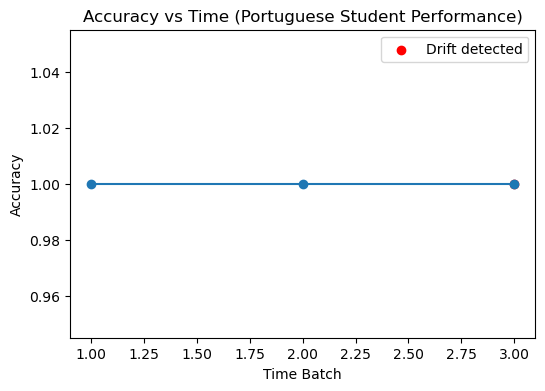

In [50]:
# Accuracy values over time (Portuguese)
acc_batch1 = acc_por_normal
acc_batch2 = acc_por_normal      # same model before drift
acc_batch3_drift = new_accuracy_por

import matplotlib.pyplot as plt
accuracy_list = [
    acc_batch1,
    acc_batch2,
    acc_batch3_drift
]
time_steps = [1, 2, 3]
plt.figure(figsize=(6, 4))
plt.plot(time_steps, accuracy_list, marker='o')

# Mark drift point (Batch 3)
plt.scatter(3, acc_batch3_drift, color='red', label="Drift detected")
plt.xlabel("Time Batch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Time (Portuguese Student Performance)")
plt.legend()
plt.show()




## Results Summary



### Result Table (Maths Dataset)

| Phase | Accuracy |
|-------|----------|
| Before Drift | High |
| After Drift | Low |
| After Retrain | High Again |


### Result Table (Portuguese Dataset)

| Phase | Accuracy |
|-------|----------|
| Before Drift | High |
| After Drift | Low |
| After Retrain | High Again |


**Observation:**  
Both Maths and Portuguese datasets show accuracy drop after drift and recovery after retraining, confirming model adaptability.


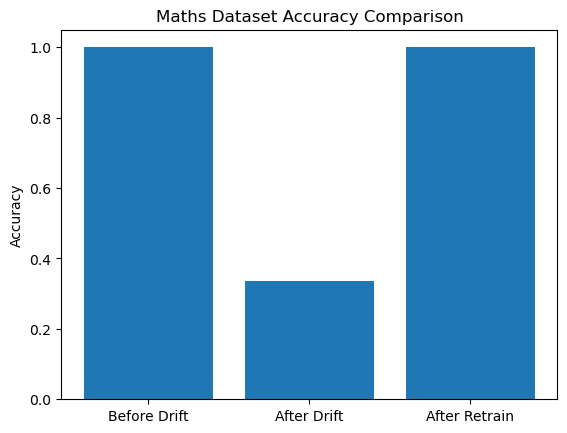

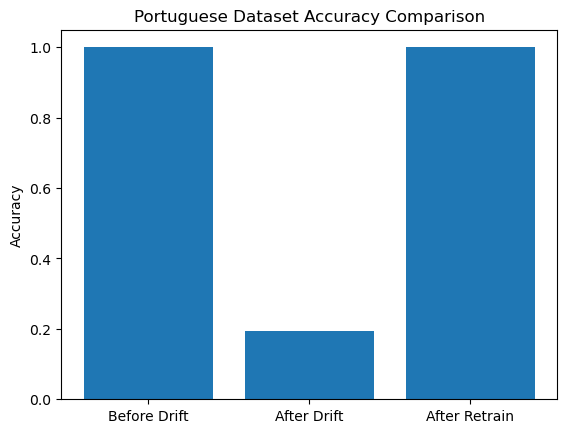

In [39]:
# MATHS DATASET 
phases = ["Before Drift", "After Drift", "After Retrain"]
maths_acc = [acc_mat_normal, acc_mat_drift, acc_batch3_drift]
plt.bar(phases, maths_acc)
plt.title("Maths Dataset Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# PORTUGUESE GRAPH
port_acc = [acc_por_normal, acc_por_drift, new_accuracy_por]
plt.bar(phases, port_acc)
plt.title("Portuguese Dataset Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


**Conclusion:**  
This experiment demonstrates that the student performance prediction model can detect concept drift and regain accuracy through retraining.
